In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline

In [5]:
def calculate_mua(b, s, w, f, m):
    _mua = b * (s * mua["oxy"] + (1-s) * mua["deoxy"]) + w * mua["water"] +  (1-w-b) * mua["collagen"] + f * mua["fat"] + m * mua["mel"]                     

    return _mua

def calculate_mus(mus500, fray, bmie, g):
    mus_p = mus500 * (fray * (wl/500)**(-4) + (1-fray) * (wl/500) ** (-bmie))
    mus = mus_p/g * 0.1
    return mus 

In [24]:
muscle = {
    "blood_volume_fraction": 0.01,
    "ScvO2": 0.80,
    "water_volume": 0.85,
    "fat_volume": 0,
    "melanin_volume": 0,
    "n": 1.40,
    "g": 0.94,
    "muspx": 5.17,
    "fray": 0.0,
    "bmie": 1.0
}

In [25]:
mua = pd.read_csv("input/coefficients.csv")
wl = np.asarray([i for i in range(650, 1001)])
mua.head(1)

,Unnamed: 0,wavelength,oxy,deoxy,water,fat,collagen,mel,musp
0,0,650,1.9706,20.081,0.0032,0.00471,0.0752,283.49,22.209


In [26]:
mua_ = calculate_mua(
    muscle["blood_volume_fraction"],
    muscle["ScvO2"],
    muscle["water_volume"],
    muscle["fat_volume"],
    muscle["melanin_volume"]
)
mus_ = calculate_mus(
    muscle["muspx"],
    muscle["fray"],
    muscle["bmie"],
    muscle["g"]
)

In [27]:
dff = pd.DataFrame({
    "wavelength[nm]": mua["wavelength"],
    "mua[1/cm]": mua_*10,
    "mus[1/cm]": mus_*10
})
dff.iloc[190,:]

wavelength[nm]    840.000000
mua[1/cm]           0.857319
mus[1/cm]           3.273810
Name: 190, dtype: float64

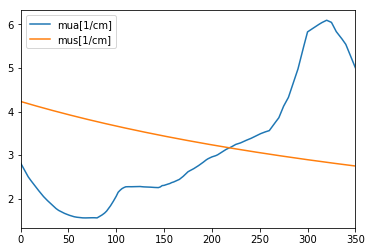

In [16]:
dff.iloc[:, 1:].plot()

In [18]:
dff.to_csv("muscle_mua_mus.csv", index=None)